In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [159]:
type(df['price'])
np.arange(1,5,1).reshape((4,1)) *1000
df2 = df.copy()
df2['truc'] = np.arange(len(df2['price'])) * 1000
df2

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,truc
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no,0
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no,1000
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no,2000
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no,3000
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no,541000
543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no,542000
544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no,543000
545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no,544000


In [163]:
df_num = df.select_dtypes(['int64', 'float64'])

df_cat = df.select_dtypes(['object'])
ohe = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()
df_cat_scaled = pd.DataFrame(le.fit_transform(df_cat).toarray(), columns=le.get_feature_names_out(), dtype=float)
df_cat_scaled

ValueError: y should be a 1d array, got an array of shape (546, 6) instead.

In [ ]:
df_num = df_num.reset_index(drop=True)

In [ ]:
df = pd.concat([df_num,df_cat_scaled], axis=1)

In [ ]:
df.nunique()
df = df.applymap(float)
df

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,42000.0,5850.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,38500.0,4000.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,49500.0,3060.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,60500.0,6650.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,61000.0,6360.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800.0,3.0,2.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
542,94000.0,6000.0,3.0,2.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
543,103000.0,6000.0,3.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
544,105000.0,6000.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X = df['lotsize'].array.reshape(len(df['lotsize']), 1)
y = df['price'].array.reshape(len(df['price']), 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
sns.heatmap(df)


ValueError: could not convert string to float: 'yes'

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

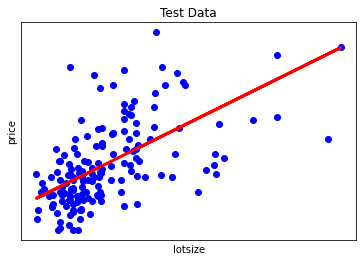

In [ ]:
plt.scatter(X_test, y_test, color='b')
plt.title('Test Data')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.xticks(())
plt.yticks(())
plt.plot(X_test, model.predict(X_test), color='red',linewidth=3)
plt.show()

In [ ]:
df.loc[~(df.price < 100000)]

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
92,163000.0,7420.0,4.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
93,128000.0,8500.0,3.0,2.0,4.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
94,123500.0,8050.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
102,125000.0,4320.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
103,132000.0,3500.0,4.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,113750.0,6000.0,3.0,1.0,4.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
531,120000.0,7000.0,3.0,1.0,4.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
543,103000.0,6000.0,3.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
544,105000.0,6000.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
